In [1]:
import pickle
import os
import pandas as pd
from dotenv import load_dotenv

load_dotenv()

DATAPATH = os.getenv("DATAPATH")
dataframes = pickle.load(open(DATAPATH+"april_cluster_row_col_dfs.pkl", "rb"))

In [2]:
import sys
sys.path.append("/home/hoangbaoan1901/Documents/information-system_UET/sem5/ai/BTL/INT3401-Midterm/LSTM_implementation")

In [3]:
len(dataframes) # 4 clusters

4

In [4]:
cluster_0 = dataframes[0]
len(cluster_0) # 80 different dataframes

80

In [5]:
df = cluster_0[list(cluster_0.keys())[0]]
df.shape

(962, 24)

In [6]:
# Print dimension of df
print(len(df.shape))

2


In [7]:
df.head()

,date,aws,imerge,tclw,cape,r850,tcwv,tcw,isor,kx,...,slor,b14b,b12b,wvb,b10b,b11b,i2b,b09b,b16b,irb
0,2019-04-01 00:00:00,0.0,0.0,0.093994,930.250,93.015000,29.742813,29.839172,0.5082,32.119940,...,0.034506,288.25058,262.22073,249.72734,266.46400,285.34500,286.39172,260.62613,272.37018,287.96760
1,2019-04-01 01:00:00,0.0,0.0,0.114746,793.250,98.464480,30.253586,30.370926,0.5082,31.468956,...,0.034506,290.57855,263.76273,249.84330,267.04724,288.03770,288.17337,260.74150,273.22253,290.76288
2,2019-04-01 02:00:00,0.0,0.0,0.131409,806.750,91.836230,30.177887,30.322403,0.5082,31.187920,...,0.034506,290.43240,263.85605,249.84330,267.04724,288.03436,287.78806,261.30444,272.86917,290.76178
3,2019-04-01 03:00:00,0.0,0.0,0.156738,1029.125,94.334305,30.166610,30.324677,0.5082,30.806915,...,0.034506,287.45575,262.18450,249.94067,266.46400,284.85562,285.19043,260.76400,271.51350,287.82123
4,2019-04-01 04:00:00,0.0,0.0,0.139221,1225.750,93.738800,29.525208,29.665360,0.5082,30.228333,...,0.034506,291.72513,265.35060,250.16780,266.26907,290.09470,288.09225,260.74150,272.51306,292.69412


In [8]:
import data_processors as dp

# get lagged data
processor = dp.TimeSeriesProcessor(time_step=6, future_step=3)

continuous_df = processor.find_continuous(df)
len(continuous_df)


IndentationError: expected an indented block after function definition on line 166 (data_processors.py, line 169)

In [ ]:
continuous_df[1].shape

(222, 23)

In [ ]:
X, y = processor.create_lagged_data(continuous_df[1])

for i in range(len(X)):
	if y[i] > 0:
		print(X[i], y[i])


(222, 23)
(222, 29)
create_lagged_data: X shape: (214, 23), y shape: (214,)
[0.0000000e+00 0.0000000e+00 2.9925537e-01 2.4762500e+02 9.7339860e+01
 3.1318817e+01 3.1619690e+01 5.0819980e-01 2.7359161e+01 2.6175964e+01
 1.7454690e+02 1.1458773e+01 2.9335388e+01 3.4506097e-02 2.8075513e+02
 2.5925818e+02 2.4080751e+02 2.5788992e+02 2.7918552e+02 2.7759497e+02
 2.5006506e+02 2.6552500e+02 2.8196884e+02] 0.2
[0.0000000e+00 0.0000000e+00 1.3751220e-01 1.6075000e+02 8.8643600e+01
 3.3806946e+01 3.3943665e+01 5.0819980e-01 3.1793098e+01 3.5230423e+01
 2.4732816e+02 8.8461090e+00 2.6433120e+01 3.4506097e-02 2.8085750e+02
 2.6085030e+02 2.4015616e+02 2.5718228e+02 2.8183432e+02 2.7850476e+02
 2.4950830e+02 2.6547708e+02 2.8090756e+02] 11.2
[0.00000000e+00 0.00000000e+00 1.25488280e-01 4.11000000e+02
 9.98651700e+01 3.54158630e+01 3.55565640e+01 5.08199800e-01
 3.31779800e+01 3.76449740e+01 1.13109566e+02 1.88111880e+01
 2.52780150e+01 3.45060970e-02 2.79881500e+02 2.59267820e+02
 2.36526950e+02

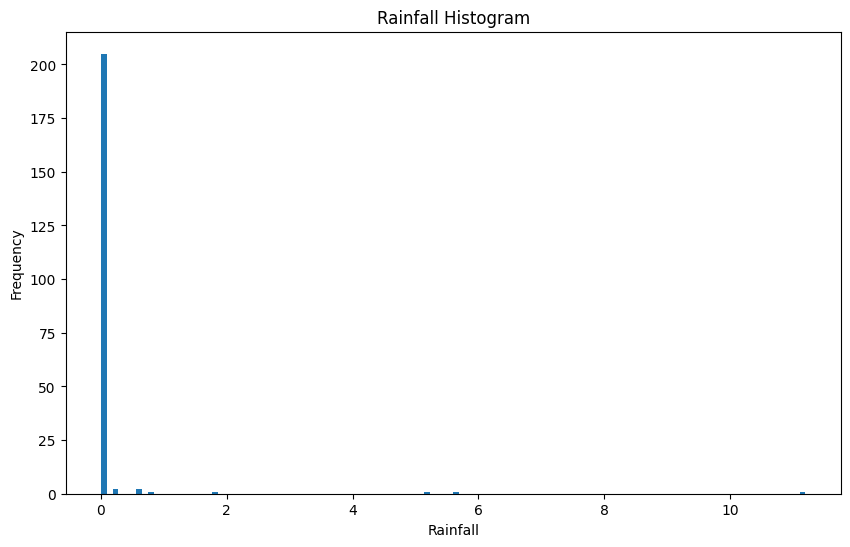

In [ ]:
# plot rainfall data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
# Draw histogram for y values
plt.hist(y, bins=120)
plt.xlabel('Rainfall')
plt.ylabel('Frequency')
plt.title('Rainfall Histogram')
plt.show()